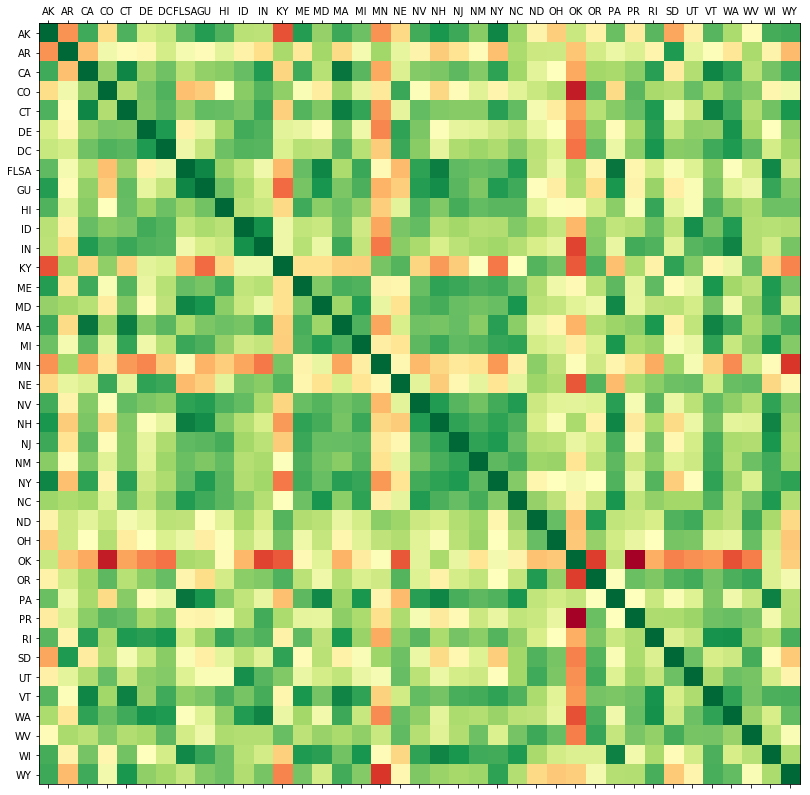

In [39]:
# Seeing how correlated the minimum wage is by state within the United States

import numpy as np
import pandas as pd

df = pd.read_csv('minwage') # opening the dataset

act_min_wage = pd.DataFrame() # saving the imported data into a new variable

for name, group in df.groupby ('State'): # grouping the data by state name
    if act_min_wage.empty:
        act_min_wage = group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}) # sorting the data by the lowest min wage value for that respective year
    else:
    else:
        act_min_wage = act_min_wage.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
            
act_min_wage.head() # dataframe is now organised by state and year 

min_wage_corr = act_min_wage.replace(0, np.NaN).dropna(axis=1).corr() # correlated min wage values with missing values replaced with NaN

min_wage_corr.head 

from matplotlib import pyplot as plt

# Plotting a graph displaying minimum wage 

#plt.matshow(min_wage_corr) # not a very useful graph, colours are weird, and not much information from numerical axes

#fig = plt.figure(figsize=(12,12))

#labels = [abr[:2] for abr in min_wage_corr.columns]  # get abr state names "first" two letters

# fig = plt.figure(figsize=(14,14))  # figure so we can add axis

# ax = fig.add_subplot(111)  # define axis, so we can modify 1x1x1

# ax.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix, and change colour to red,yellow,green

# ax.set_xticks(np.arange(len(labels)))  #  all state abrs in the x-axis

# ax.set_yticks(np.arange(len(labels)))  #  all state abrs in the y-axis

# ax.set_xticklabels(labels)  # display all state abr in the x-axis

# ax.set_yticklabels(labels)  # display all state abr in the y-axis

# plt.show()

# Some states are listed more than once, which causes confusion

dfs = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes') # will pull state abvs from online website since pandas can read table formatted data even from the internet!

state_abrs = dfs[0]

state_abrs.head() # Web scrape worked, but what i was actually looking for was postal code instead of abbreviation

state_abrs.to_csv('state_abrs.csv') # Saving a csv copy of the table pulled from online to avoid too many pulling requests from website

state_abrs = pd.read_csv('state_abrs.csv') # reading the csv just created with pandas

state_abrs.head()

state_abrs[["State/District", "Postal Code"]].to_csv("state_abrs.csv", index=False) # only using these two columns from the csv, creating a new csv with only these columns and removing the index

state_abrs = pd.read_csv("state_abrs.csv", index_col=0) # reading the csv from the previous line, with index column = 0 to make sure no index shows

state_abrs.head(13) # looking at the first 13 states to make sure everything looks good

abrs_dict = state_abrs.to_dict() # Creating dictionary of postal codes from state_abrs data

abrs_dict

abrs_dict= abrs_dict['Postal Code'] # referencing the dict just created

abrs_dict # Finito!

# have to hardcode the following in, since they are not accounted for in the original state abbreviations html

abrs_dict['Federal (FLSA)'] = "FLSA" 
abrs_dict['Guam'] = "GU"
abrs_dict['Puerto Rico'] = "PR"


labels = [abrs_dict[c] for c in min_wage_corr.columns] 

fig = plt.figure(figsize=(14,14))  # figure so we can add axis

axis = fig.add_subplot(111)  # define axis, so we can modify

axis.matshow(min_wage_corr, cmap=plt.cm.RdYlGn)  # display the matrix

axis.set_xticks(np.arange(len(labels)))  # show them all!

axis.set_yticks(np.arange(len(labels)))  # show them all!

axis.set_xticklabels(labels)  # set to be the abrs (vs useless #)

axis.set_yticklabels(labels)  # set to be the abrs (vs useless #)

plt.show()






